# 1) Getting to Know a Dataset

## Initial exploration

**Functions for initial exploration**

You are researching unemployment rates worldwide and have been given a new dataset to work with. The data has been saved and loaded for you as a pandas DataFrame called unemployment. You've never seen the data before, so your first task is to use a few pandas functions to learn about this new data.

In [1]:
import pandas as pd

In [2]:
unemployment = pd.read_csv("/home/cyberx/data_camp_courses/datasets/exploratory_data_analysis/clean_unemployment.csv")

In [3]:
# Print the first five rows of unemployment
print(unemployment.head())

  country_code          country_name      continent   2010   2011   2012  \
0          AFG           Afghanistan           Asia  11.35  11.05  11.34   
1          AGO                Angola         Africa   9.43   7.36   7.35   
2          ALB               Albania         Europe  14.09  13.48  13.38   
3          ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4          ARG             Argentina  South America   7.71   7.18   7.22   

    2013   2014   2015   2016   2017   2018   2019   2020   2021  
0  11.19  11.14  11.13  11.16  11.18  11.15  11.22  11.71  13.28  
1   7.37   7.37   7.39   7.41   7.41   7.42   7.42   8.33   8.53  
2  15.87  18.05  17.19  15.42  13.62  12.30  11.47  13.33  11.82  
3   2.04   1.91   1.77   1.64   2.46   2.35   2.23   3.19   3.36  
4   7.10   7.27   7.52   8.11   8.35   9.22   9.84  11.46  10.90  


In [4]:
# Print a summary of non-missing values and data types in the unemployment DataFrame
print(unemployment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB
None


In [5]:
# Print summary statistics for numerical columns in unemployment
print(unemployment.describe())

             2010        2011        2012        2013        2014        2015  \
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000   
mean     8.409286    8.315440    8.317967    8.344780    8.179670    8.058901   
std      6.248887    6.266795    6.367270    6.416041    6.284241    6.161170   
min      0.450000    0.320000    0.480000    0.250000    0.200000    0.170000   
25%      4.015000    3.775000    3.742500    3.692500    3.625000    3.662500   
50%      6.965000    6.805000    6.690000    6.395000    6.450000    6.170000   
75%     10.957500   11.045000   11.285000   11.310000   10.695000   10.215000   
max     32.020000   31.380000   31.020000   29.000000   28.030000   27.690000   

             2016        2017        2018        2019        2020        2021  
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000  
mean     7.925879    7.668626    7.426429    7.243736    8.420934    8.390879  
std      6.045439    5.902152 

**Counting categorical values**

Recall from the previous exercise that the unemployment DataFrame contains 182 rows of country data including country_code, country_name, continent, and unemployment percentages from 2010 through 2021.

You'd now like to explore the categorical data contained in unemployment to understand the data that it contains related to each continent.

In [6]:
# Count the values associated with each continent in unemployment
print(unemployment.value_counts("continent"))

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64


**Global unemployment in 2021**

It's time to explore some of the numerical data in unemployment! What was typical unemployment in a given year? What was the minimum and maximum unemployment rate, and what did the distribution of the unemployment rates look like across the world? A histogram is a great way to get a sense of the answers to these questions.

Your task in this exercise is to create a histogram showing the distribution of global unemployment rates in 2021.

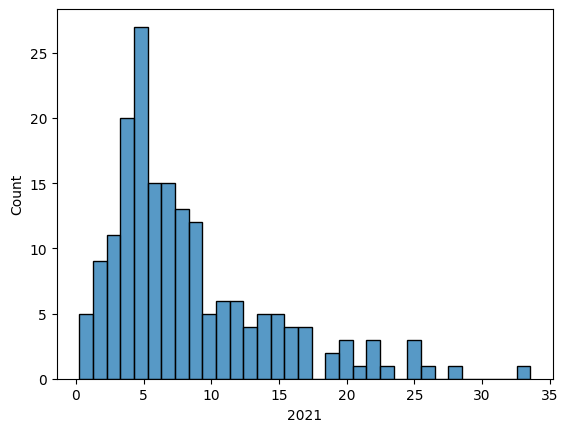

In [11]:
# Import the required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(unemployment, x="2021", binwidth=1)
plt.show()

## Data validation

**Detecting data types**

A column has been changed in the unemployment DataFrame and it now has the wrong data type! This data type will stop you from performing effective exploration and analysis, so your task is to identify which column has the wrong data type and then fix it.

In [13]:
# Update the data type of the 2019 column to a float
unemployment["2019"] = unemployment["2019"].astype(str)

In [14]:
unemployment.dtypes

country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019             object
2020            float64
2021            float64
dtype: object

In [15]:
# Update the data type of the 2019 column to a float
unemployment["2019"] = unemployment["2019"].astype(float)
# Print the dtypes to check your work
print(unemployment.dtypes)

country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object


**Validating continents**

Your colleague has informed you that the data on unemployment from countries in Oceania is not reliable, and you'd like to identify and exclude these countries from your unemployment data. The .isin() function can help with that!

Your task is to use .isin() to identify countries that are not in Oceania. These countries should return True while countries in Oceania should return False. This will set you up to use the results of .isin() to quickly filter out Oceania countries using Boolean indexing.

In [16]:
# Define a Series describing whether each continent is outside of Oceania
not_oceania = ~unemployment["continent"].isin(["Oceania"])

# Print unemployment without records related to countries in Oceania
print(unemployment[not_oceania])

    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
178          YEM           Yemen, Rep.           Asia  12.83  13.23  13.17   
179          ZAF          South Africa         Africa  24.68  24.64  24.73   
180          ZMB                Zambia         Africa  13.19  10.55   7.85   
181          ZWE              Zimbabwe         Africa   5.21   5.37   5.15   

      2013   2014   2015   2016   2017   2018   2019   2020   2

**Validating range**

Now it's time to validate our numerical data. We saw in the previous lesson using .describe() that the largest unemployment rate during 2021 was nearly 34 percent, while the lowest was just above zero.

Your task in this exercise is to get much more detailed information about the range of unemployment data using Seaborn's boxplot, and you'll also visualize the range of unemployment rates in each continent to understand geographical range differences.

In [17]:
# Print the minimum and maximum unemployment rates during 2021
print(unemployment['2021'].min(), unemployment['2021'].max())

0.26 33.56


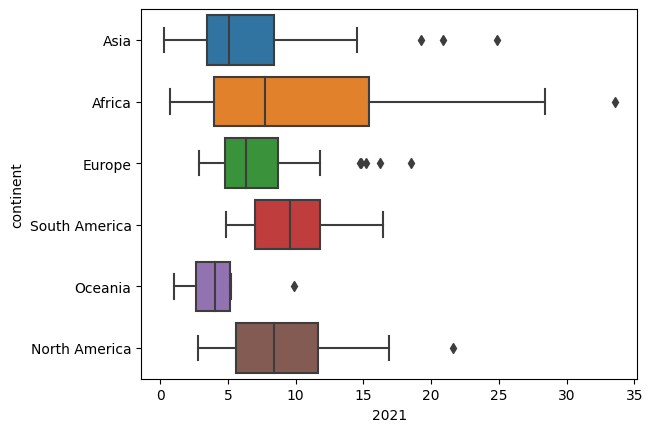

In [11]:
# Create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data=unemployment, x='2021', y='continent')
plt.show()

```
Perhatikan betapa berbedanya rentang pengangguran antabenua. 
Misalnya, persentil ke-50 di Afrika lebih rendah dari pada 
di Amerika Utara, tetapi rentangnya jauh lebih lebar.
```

## Data summarization

**Summaries with .groupby() and .agg()**

In this exercise, you'll explore the means and standard deviations of the yearly unemployment data. First, you'll find means and standard deviations regardless of the continent to observe worldwide unemployment trends. Then, you'll check unemployment trends broken down by continent.

In [1]:
import pandas as pd
import numpy as np

In [2]:
unemployment = pd.read_csv("/home/cyberx/data_camp_courses/datasets/exploratory_data_analysis/clean_unemployment.csv")

In [3]:
print(unemployment.dtypes)

country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object


In [4]:
# Print the mean and standard deviation of rates by year
print(unemployment.agg(['mean', 'std']).round(3))

       2010   2011   2012   2013   2014   2015   2016   2017   2018   2019  \
mean  8.409  8.315  8.318  8.345  8.180  8.059  7.926  7.669  7.426  7.244   
std   6.249  6.267  6.367  6.416  6.284  6.161  6.045  5.902  5.819  5.697   

       2020   2021  
mean  8.421  8.391  
std   6.041  6.067  


In [6]:
# Print yearly mean and standard deviation grouped by continent
print(unemployment.groupby("continent").agg(["mean", "std"]).round(3))

                 2010           2011           2012           2013         \
                 mean    std    mean    std    mean    std    mean    std   
continent                                                                   
Africa          9.344  7.411   9.369  7.402   9.241  7.265   9.132  7.309   
Asia            6.241  5.146   5.942  4.780   5.835  4.757   5.852  4.668   
Europe         11.008  6.392  10.948  6.540  11.326  7.004  11.467  6.969   
North America   8.663  5.116   8.563  5.377   8.449  5.496   8.841  6.082   
Oceania         3.622  2.055   3.648  2.008   4.104  2.723   3.980  2.640   
South America   6.871  2.807   6.518  2.802   6.411  2.937   6.335  2.809   

                 2014         ...   2017          2018          2019         \
                 mean    std  ...   mean    std   mean    std   mean    std   
continent                     ...                                             
Africa          9.121  7.291  ...  9.285  7.408  9.238  7.358  9.264 

**Named aggregations**

You've seen how .groupby() and .agg() can be combined to show summaries across categories. Sometimes, it's helpful to name new columns when aggregating so that it's clear in the code output what aggregations are being applied and where.

Your task is to create a DataFrame called continent_summary which shows a row for each continent. The DataFrame columns will contain the mean unemployment rate for each continent in 2021 as well as the standard deviation of the 2021 employment rate. And of course, you'll rename the columns so that their contents are clear!

In [7]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021=("2021", "mean"),
    # Create the std_rate_2021 column
    std_rate_2021=("2021", "std")
)


print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


**Visualizing categorical summaries**

As you've learned in this chapter, Seaborn has many great visualizations for exploration, including a bar plot for displaying an aggregated average value by category of data.

In Seaborn, bar plots include a vertical bar indicating the 95% confidence interval for the categorical mean. Since confidence intervals are calculated using both the number of values and the variability of those values, they give a helpful indication of how much data can be relied upon.

Your task is to create a bar plot to visualize the means and confidence intervals of unemployment rates across the different continents.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

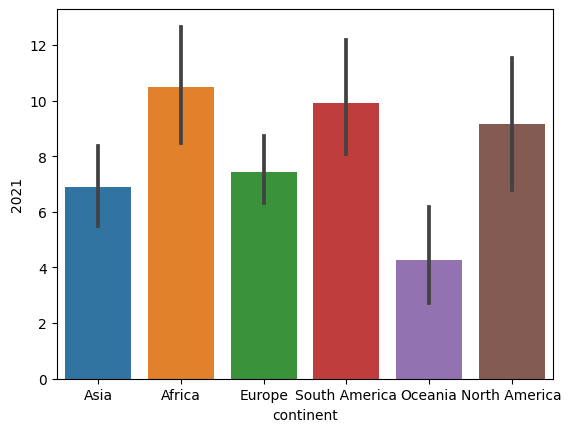

In [10]:
# Create a bar plot of continents and their average unemployment
sns.barplot(x="continent", y="2021", data=unemployment)
plt.show()

```
Walaupun Eropa memiliki rata-rata pengangguran yang lebih tinggi dari pada Asia, 
Eropa juga memiliki interval keyakinan yang lebih kecil untuk rata-rata tersebut, 
sehingga nilai rata-ratanya lebih dapat diandalkan.
```

# 2) Data Cleaning and Imputation

## Addressing missing data

**Dealing with missing data**

It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called planes, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.

In [12]:
import pandas as pd

In [13]:
# Dataset
planes = pd.read_csv("/home/cyberx/data_camp_courses/datasets/exploratory_data_analysis/planes.csv")

planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [14]:
# Count the number of missing values in each column
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [15]:
# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


```
By creating a missing values threshold and using it to filter columns, 
you've managed to remove missing values from all columns 
except for "Additional_Info" and "Price".
```

**Strategies for remaining missing data**

The five percent rule has worked nicely for your planes dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the "Additional_Info" and "Price" columns, which are missing 300 and 368 values respectively.

You'll first take a look at what "Additional_Info" contains, then visualize the price of plane tickets by different airlines.

The following imports have been made for you:

```
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
```

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


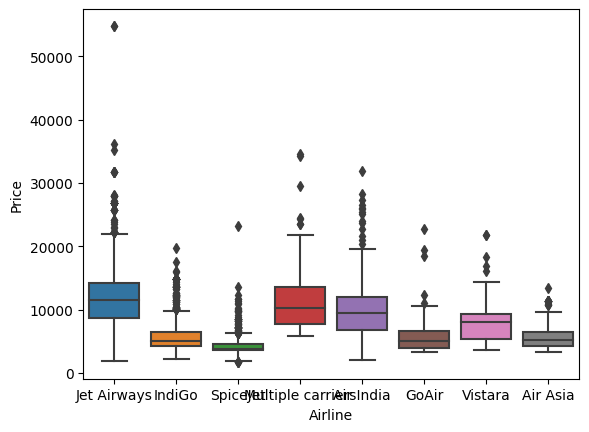

In [18]:
# Create a box plot of Price by Airline
sns.boxplot(data=planes, x="Airline", y="Price")

plt.show()

***Question***

How should you deal with the missing values in "Additional_Info" and "Price"?

***Answer:***

Anda tidak memerlukan kolom "Additional_Info", dan harus memasukkan median "Harga" 

menurut "Maskapai Penerbangan" agar dapat mewakili data secara akurat!

*****

**Imputing missing plane prices**

Now there's just one column with missing values left!

You've removed the "Additional_Info" column from planes—the last step is to impute the missing data in the "Price" column of the dataset.

As a reminder, you generated this boxplot, which suggested that imputing the median price based on the "Airline" is a solid approach!

<img src="https://assets.datacamp.com/production/repositories/6180/datasets/c2534724ae536cdb5fa471fd458f7efa7ff655da/Screenshot%202024-08-16%20at%2013.59.57.png" alt="Box plot of plane ticket prices by Airline">

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Dataset
planes = pd.read_csv("/home/cyberx/data_camp_courses/datasets/exploratory_data_analysis/planes.csv")

planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [3]:
# Count the number of missing values in each column
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [4]:
# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


In [5]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


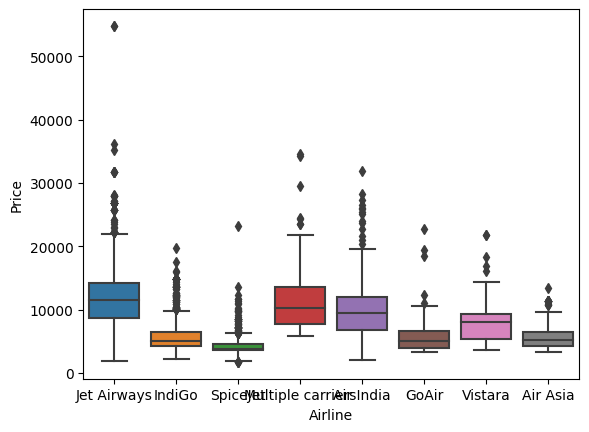

In [6]:
# Create a box plot of Price by Airline
sns.boxplot(data=planes, x="Airline", y="Price")

plt.show()

In [ ]:
""" 
Tidak memerlukan kolom "Additional_Info", dan harus memasukkan median "Harga" 
menurut "Maskapai Penerbangan" agar dapat mewakili data secara akurat!
"""

In [ ]:
# Drop Column Additional_Info
new_planes = planes.drop(columns=["Additional_Info"])

In [10]:
# Calculate median plane ticket prices by Airline
airline_prices = new_planes.groupby("Airline")["Price"].median()

print(airline_prices)

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


In [11]:
# Convert to a dictionary
prices_dict = airline_prices.to_dict()

# Map the dictionary to missing values of Price by Airline
new_planes["Price"] = new_planes["Price"].fillna(new_planes["Airline"].map(prices_dict))

print(planes[['Airline', 'Price']].head())

       Airline    Price
0  Jet Airways  13882.0
1       IndiGo   6218.0
2       IndiGo  13302.0
3     SpiceJet   3873.0
4  Jet Airways  11087.0


In [12]:
# Check for missing values
print(new_planes.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


## Converting and analyzing categorical data

**Finding the number of unique values**

You would like to practice some of the categorical data manipulation and analysis skills that you've just seen. To help identify which data could be reformatted to extract value, you are going to find out which non-numeric columns in the planes dataset have a large number of unique values.

In [1]:
import pandas as pd

In [2]:
planes = pd.read_csv("/home/cyberx/data_camp_courses/datasets/exploratory_data_analysis/planes.csv")

In [3]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes('object')

# Loop through columns
for col in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  126
Number of unique values in Dep_Time column:  221
Number of unique values in Arrival_Time column:  1334
Number of unique values in Duration column:  367
Number of unique values in Total_Stops column:  5
Number of unique values in Additional_Info column:  10


**Flight duration categories**

As you saw, there are 362 unique values in the "Duration" column of planes. Calling planes["Duration"].head(), we see the following values:
```
0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object
```
Looks like this won't be simple to convert to numbers. However, you could categorize flights by duration and examine the frequency of different flight lengths!

You'll create a "Duration_Category" column in the planes DataFrame. Before you can do this you'll need to create a list of the values you would like to insert into the DataFrame, followed by the existing values that these should be created from.

In [4]:
planes['Duration'].head()

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

In [5]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short_flights
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium_flights
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long_flights
long_flights = "10h|11h|12h|13h|14h|15h|16h"

**Adding duration categories**

Now that you've set up the categories and values you want to capture, it's time to build a new column to analyze the frequency of flights by duration!

The variables flight_categories, short_flights, medium_flights, and long_flights that you previously created are available to you.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights, na=False)),
    (planes["Duration"].str.contains(medium_flights, na=False)),
    (planes["Duration"].str.contains(long_flights, na=False))
]

In [12]:
# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")

In [14]:
planes[['Duration','Duration_Category']]

,Duration,Duration_Category
0,19h,Extreme duration
1,5h 25m,Medium
2,4h 45m,Short-haul
3,2h 25m,Short-haul
4,15h 30m,Long-haul
...,...,...
10655,2h 30m,Short-haul
10656,2h 35m,Short-haul
10657,3h,Short-haul
10658,2h 40m,Short-haul


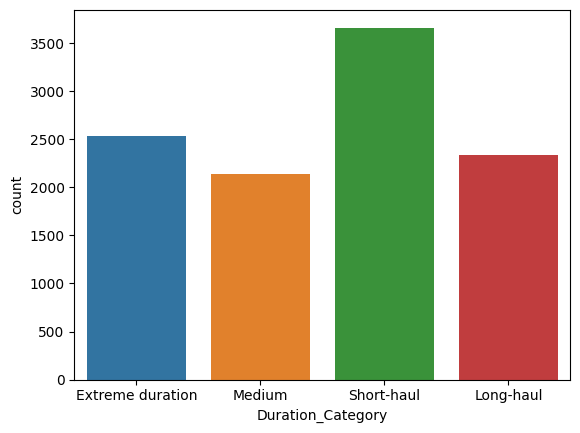

In [13]:
# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

## Working with numeric data

**Flight duration**

You would like to analyze the duration of flights, but unfortunately, the "Duration" column in the planes DataFrame currently contains string values.

You'll need to clean the column and convert it to the correct data type for analysis. seaborn has been imported as sns.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
planes = pd.read_csv("/home/cyberx/data_camp_courses/datasets/exploratory_data_analysis/planes.csv")

In [3]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [4]:
print(planes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB
None


In [5]:
# Preview the column
print(planes["Duration"].head())

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


In [6]:
# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", "").str.replace(" ", ".").str.replace("m", "")

# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float).round(1)

In [7]:
# Preview the column after remove string
print(planes["Duration"].head())

0    19.0
1     5.2
2     4.4
3     2.2
4    15.3
Name: Duration, dtype: float64


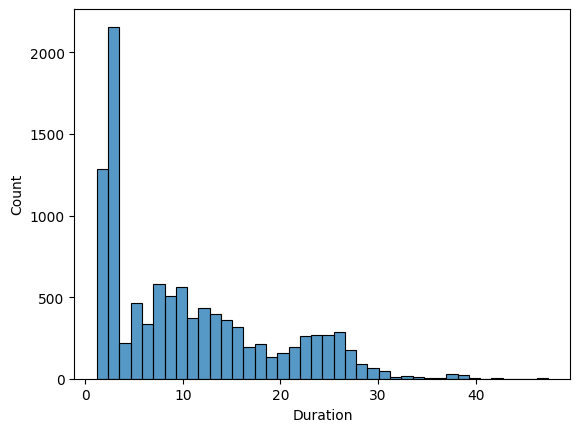

In [8]:
# Plot a histogram
sns.histplot(x="Duration", data=planes)
plt.show()

**Adding descriptive statistics**

Now "Duration" and "Price" both contain numeric values in the planes DataFrame, you would like to calculate summary statistics for them that are conditional on values in other columns.

In [9]:
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"] \
                                        .transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4230.748840             3685
IndiGo             2266.753552             1981
Air India          3865.871975             1686
Multiple carriers  3763.674706             1148
SpiceJet           1790.851944              787
Vistara            2864.267802              455
Air Asia           2016.738954              309
GoAir              2790.815129              182
dtype: int64


In [10]:
# Median Duration by Airline
planes["airline_median_duration"] = planes.groupby("Airline")["Duration"] \
                                            .transform(lambda x: x.median())

print(planes[["Airline","airline_median_duration"]].value_counts())

Airline            airline_median_duration
Jet Airways        13.2                       3685
IndiGo             2.6                        1981
Air India          15.6                       1686
Multiple carriers  10.2                       1148
SpiceJet           2.3                         787
Vistara            3.1                         455
Air Asia           2.5                         309
GoAir              5.1                         182
dtype: int64


In [11]:
# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"] \
                                            .transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10506.993486              4391
Banglore     9132.225153               2773
Delhi        5157.794118               1219
New Delhi    11738.589499               888
Hyderabad    5025.210280                673
Kolkata      4801.489796                369
dtype: int64


## Handling outliers

**What to do with outliers**

Identifying and dealing with outliers is an integral step in performing exploratory data analysis.

In this exercise, you'll be presented with scenarios where outliers are present, and you need to decide what action you should take.

***Answer:***

<img src="/home/cyberx/data_camp_courses/images/Screenshot 2024-11-28 095911.png">

****

**Identifying outliers**

You've proven that you recognize what to do when presented with outliers, but can you identify them using visualizations?

Try to figure out if there are outliers in the "Price" or "Duration" columns of the planes DataFrame.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
planes = pd.read_csv("/home/cyberx/data_camp_courses/datasets/exploratory_data_analysis/planes.csv")

In [3]:
print(planes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB
None


In [4]:
# Preview the column
print(planes["Duration"].head())

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


In [5]:
# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", "") \
                                        .str.replace(" ", ".") \
                                        .str.replace("m", "")

# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float).round(1)

In [6]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.0,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.2,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.4,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2.2,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15.3,1 stop,In-flight meal not included,11087.0


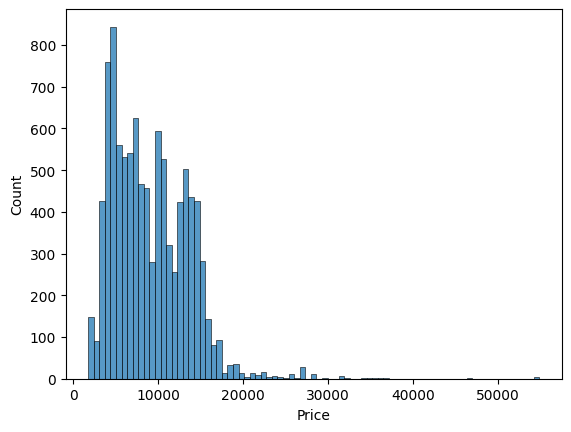

In [7]:
# Plot a histogram of flight prices
sns.histplot(data=planes, x="Price")
plt.show()

In [8]:
# Display descriptive statistics for flight duration
print(planes['Duration'].describe())

count    10446.000000
mean        10.566590
std          8.491621
min          1.200000
25%          2.500000
50%          8.400000
75%         15.400000
max         47.400000
Name: Duration, dtype: float64


***Question***

Which column potentially contains outliers?

***Answer***

Price and Duration

**Removing outliers**

While removing outliers isn't always the way to go, for your analysis, you've decided that you will only include flights where the "Price" is not an outlier.

Therefore, you need to find the upper threshold and then use it to remove values above this from the planes DataFrame.

In [10]:
# Display descriptive statistics for flight duration
print(planes['Price'].describe())

count    10044.000000
mean      9044.411191
std       4472.304869
min       1759.000000
25%       5276.750000
50%       8366.000000
75%      12373.000000
max      54826.000000
Name: Price, dtype: float64


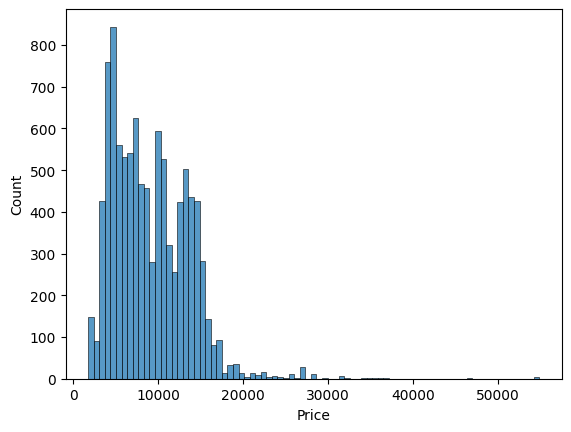

In [12]:
# Plot a histogram of flight prices
sns.histplot(data=planes, x="Price")
plt.show()

In [13]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
no_outliers_planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(no_outliers_planes["Price"].describe())

count     9959.000000
mean      8875.160860
std       4057.202002
min       1759.000000
25%       5228.000000
50%       8283.000000
75%      12284.000000
max      23001.000000
Name: Price, dtype: float64


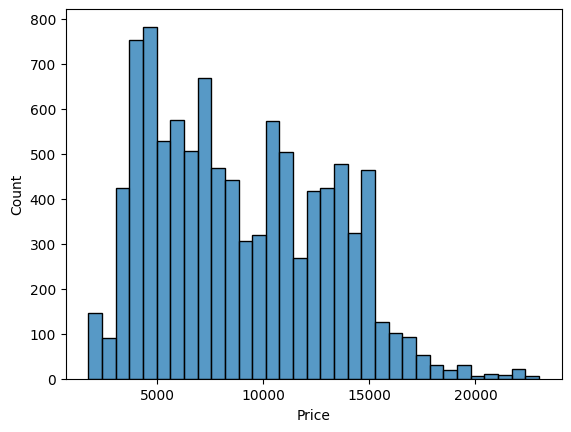

In [14]:
# Plot a histogram of flight prices
sns.histplot(data=no_outliers_planes, x="Price")
plt.show()

Ridiculous outlier removal skills! You managed to create thresholds based on the IQR and used them to filter the planes dataset to eliminate extreme prices. Originally the dataset had a maximum price of almost 55000, but the output of planes.describe() shows the maximum has been reduced to around 23000, reflecting a less skewed distribution for analysis!

# 3) Relationships in Data

## Patterns over time

**Importing DateTime data**

You'll now work with the entire divorce dataset! The data describes Mexican marriages dissolved between 2000 and 2015. It contains marriage and divorce dates, education level, birthday, income for each partner, and marriage duration, as well as the number of children the couple had at the time of divorce.

The column names and data types are as follows:
```
divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
```
It looks like there is a lot of date information in this data that is not yet a DateTime data type! Your task is to fix that so that you can explore patterns over time.

In [15]:
import pandas as pd

In [17]:
# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv("/home/cyberx/data_camp_courses/datasets/exploratory_data_analysis/divorce.csv", 
                      parse_dates=['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])

In [19]:
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


In [18]:
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


**Updating data type to DateTime**

Now, the divorce DataFrame has been loaded for you, but one column is stored as a string that should be DateTime data. Which one is it? Once you've identified the column, you'll update it so that you can explore it more closely in the next exercise.

In [1]:
import pandas as pd

In [2]:
divorce = pd.read_csv("/home/cyberx/data_camp_courses/datasets/exploratory_data_analysis/divorce.csv", 
                      parse_dates=['divorce_date', 'dob_man', 'dob_woman'])

In [3]:
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date                object
marriage_duration           float64
num_kids                    float64
dtype: object

In [4]:
# Convert the marriage_date column to DateTime values
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])

In [5]:
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

**Visualizing relationships over time**

Now that your date data is saved as DateTime data, you can explore patterns over time! Does the year that a couple got married have a relationship with the number of children that the couple has at the time of divorce? Your task is to find out!

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_year
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,2000
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,2001
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2000
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,2006
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,2007


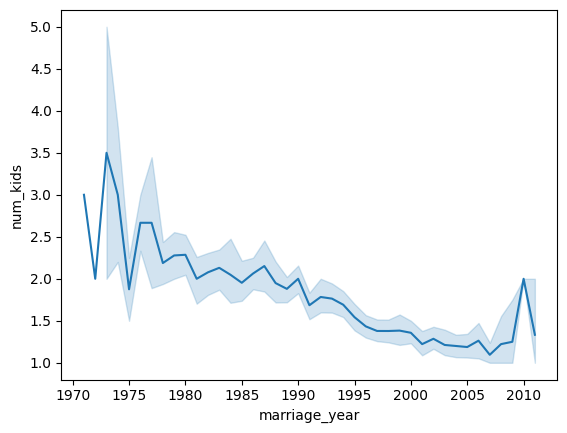

In [8]:
# Create a line plot showing the average number of kids by year
sns.lineplot(data=divorce, x="marriage_year", y="num_kids")
plt.show()

tampaknya pasangan yang menikah di usia lanjut juga memiliki lebih sedikit anak selama pernikahan mereka.

## Correlation

**Interpreting a heatmap**

Which of the below statements is correct regarding the relationships between variables in the divorce DataFrame?

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
divorce = pd.read_csv("/home/cyberx/data_camp_courses/datasets/exploratory_data_analysis/divorce.csv", 
                      parse_dates=['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])

divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


In [3]:
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [6]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Define the marriage_month column
divorce["marriage_month"] = divorce["marriage_date"].dt.month

divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_year,marriage_month
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,2000,6
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,2001,9
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2000,2
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,2006,5
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,2007,8


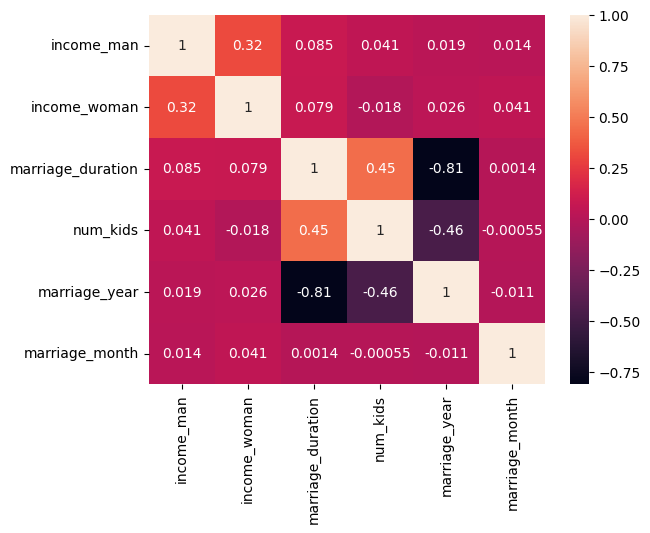

'Tahun pernikahan yang lebih lambat berkorelasi dengan memiliki lebih sedikit anak'

In [11]:
sns.heatmap(divorce.corr(), annot=True)
plt.show()

"""Tahun pernikahan yang lebih lambat berkorelasi dengan memiliki lebih sedikit anak"""

**Visualizing variable relationships**

In the last exercise, you may have noticed that a longer marriage_duration is correlated with having more children, represented by the num_kids column. The correlation coefficient between the marriage_duration and num_kids variables is 0.45.

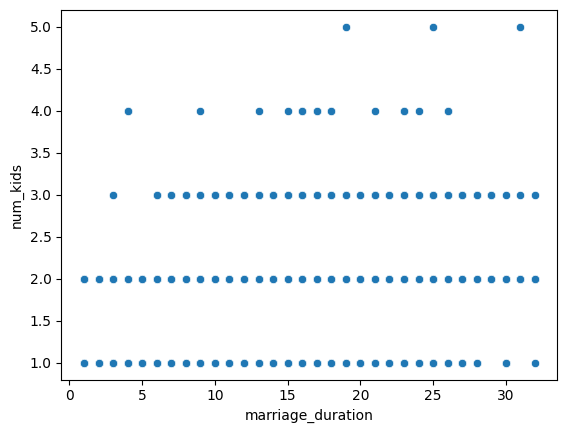

In [12]:
# Create the scatterplot
sns.scatterplot(data=divorce, x="marriage_duration", y="num_kids")
plt.show()

Ada sedikit hubungan positif dalam diagram sebar. Dalam kumpulan data, pasangan tanpa anak tidak memiliki nilai di kolom num_kids. Jika  yakin bahwa semua atau sebagian besar nilai yang hilang dalam num_kids terkait dengan pasangan tanpa anak, dapat mempertimbangkan untuk memperbarui nilai-nilai ini menjadi 0, yang mungkin meningkatkan korelasi.

**Visualizing multiple variable relationships**

Seaborn's .pairplot() is excellent for understanding the relationships between several or all variables in a dataset by aggregating pairwise scatter plots in one visual.

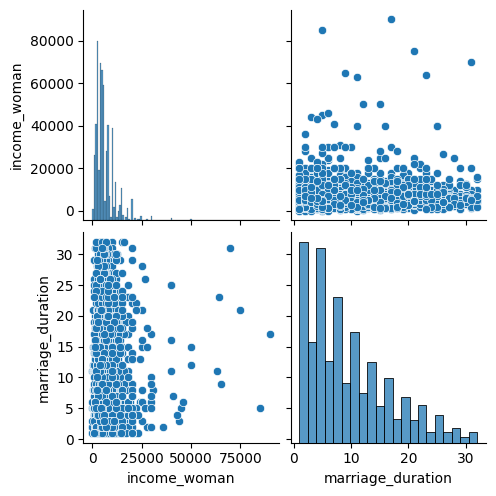

In [13]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars=['income_woman' , 'marriage_duration'])
plt.show()

Sama seperti pada matriks korelasi, Anda dapat melihat bahwa hubungan antara income_woman dan marriage_duration tidaklah kuat. Anda juga dapat melihat distribusi kedua variabel pada plot kiri atas dan kanan bawah.

## Factor relationships and distributions

**Categorical data in scatter plots**

In the video, we explored how men's education and age at marriage related to other variables in our dataset, the divorce DataFrame. Now, you'll take a look at how women's education and age at marriage relate to other variables!

Your task is to create a scatter plot of each woman's age and income, layering in the categorical variable of education level for additional context.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
divorce = pd.read_csv("/home/cyberx/data_camp_courses/datasets/exploratory_data_analysis/divorce.csv", 
                      parse_dates=['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])

divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


In [3]:
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [4]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Define the marriage_month column
divorce["marriage_month"] = divorce["marriage_date"].dt.month

divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_year,marriage_month
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,2000,6
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,2001,9
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2000,2
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,2006,5
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,2007,8


In [5]:
divorce["woman_age_marriage"] = divorce["marriage_year"] - divorce["dob_man"].dt.year
divorce["man_age_marriage"] = divorce["marriage_year"] - divorce["dob_woman"].dt.year

In [6]:
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_year,marriage_month,woman_age_marriage,man_age_marriage
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,2000,6,25,17
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,2001,9,25,24
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2000,2,31,30
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,2006,5,27,25
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,2007,8,25,19


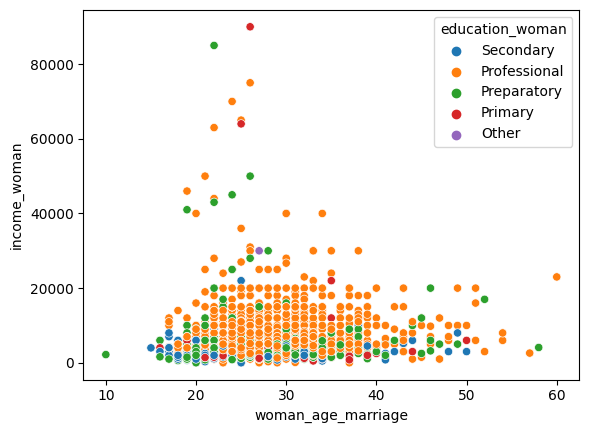

In [7]:
# Create the scatter plot
sns.scatterplot(data=divorce, x="woman_age_marriage", y="income_woman", hue="education_woman")
plt.show()

**Exploring with KDE plots**

Kernel Density Estimate (KDE) plots are a great alternative to histograms when you want to show multiple distributions in the same visual.

Suppose you are interested in the relationship between marriage duration and the number of kids that a couple has. Since values in the num_kids column range only from one to five, you can plot the KDE for each value on the same plot.

The divorce DataFrame has been loaded for you. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns. Recall that the num_kids column in divorce lists only N/A values for couples with no children, so you'll only be looking at distributions for divorced couples with at least one child.

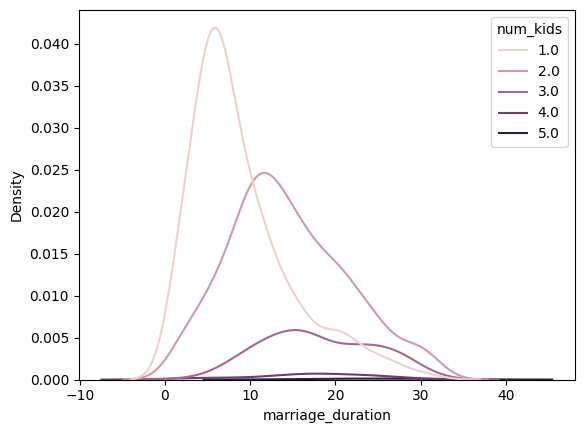

In [8]:
# Create the KDE plot
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids")
plt.show()

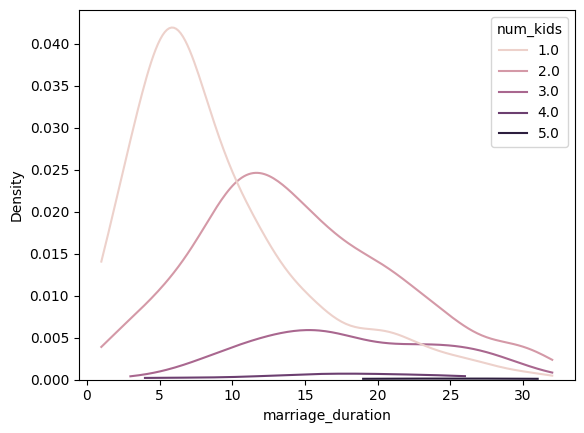

In [9]:
# Update the KDE plot so that marriage duration can't be smoothed too far
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0)
plt.show()

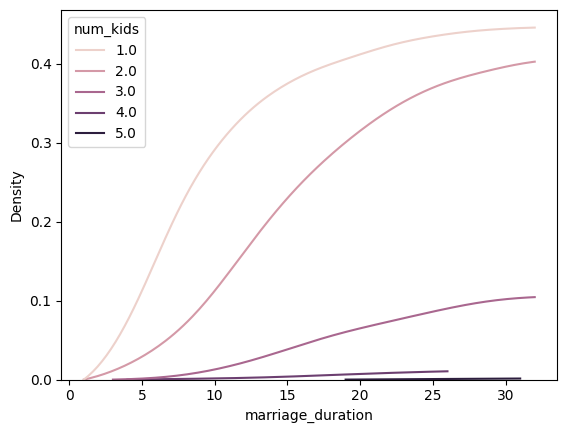

In [10]:
# Update the KDE plot to show a cumulative distribution function
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()

Tampaknya ada korelasi positif antara pernikahan yang lebih lama dan lebih banyak anak, tetapi tentu saja, ini tidak menunjukkan hubungan sebab akibat. Anda juga dapat melihat bahwa ada lebih sedikit data tentang pasangan dengan lebih dari dua anak.

# 4) Turning Exploratory Analysis into Action

## Considerations for categorical data

**Checking for class imbalance**

The [2022 Kaggle Survey](https://www.kaggle.com/kaggle-survey-2022) captures information about data scientists' backgrounds, preferred technologies, and techniques. It is seen as an accurate view of what is happening in data science based on the volume and profile of responders.

Having looked at the job titles and categorized to align with our salaries DataFrame, you can see the following proportion of job categories in the Kaggle survey:

| Job Category | Relative Frequency |
|-------------- | ------------------|
| Data Science	| 0.281236 |
| Data Analytics | 0.224231 |
| Other	| 0.214609 |
| Managerial | 0.121300 |
| Machine Learning | 0.083248 |
| Data Engineering | 0.075375 |

Thinking of the Kaggle survey results as the population, your task is to find out whether the salaries DataFrame is representative by comparing the relative frequency of job categories.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
salaries = pd.read_csv("/home/cyberx/data_camp_courses/datasets/exploratory_data_analysis/ds_salaries_clean.csv")

salaries

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0
...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,Senior,FT,US,M,100,147044.0
603,2022,Data Engineer,Senior,FT,US,M,100,120309.0
604,2022,Data Analyst,Senior,FT,US,M,0,123174.0
605,2022,Data Analyst,Senior,FT,US,M,100,143225.0


In [3]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 38.1+ KB


In [4]:
salaries.select_dtypes("object").head()

,Designation,Experience,Employment_Status,Employee_Location,Company_Size
0,Data Scientist,Mid,FT,DE,L
1,Machine Learning Scientist,Senior,FT,JP,S
2,Big Data Engineer,Senior,FT,GB,M
3,Product Data Analyst,Mid,FT,HN,S
4,Machine Learning Engineer,Senior,FT,US,L


In [5]:
#Top 5 most common designation job title
new_data = salaries["Designation"].value_counts().head()

print(new_data)

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: Designation, dtype: int64


In [6]:
new_data = list(zip(new_data.index, new_data[0:6]))
df_visual_salaries = pd.DataFrame(new_data, columns=['Designation', 'Number of Professionals'])
print(df_visual_salaries)

                 Designation  Number of Professionals
0             Data Scientist                      143
1              Data Engineer                      132
2               Data Analyst                       97
3  Machine Learning Engineer                       41
4         Research Scientist                       16


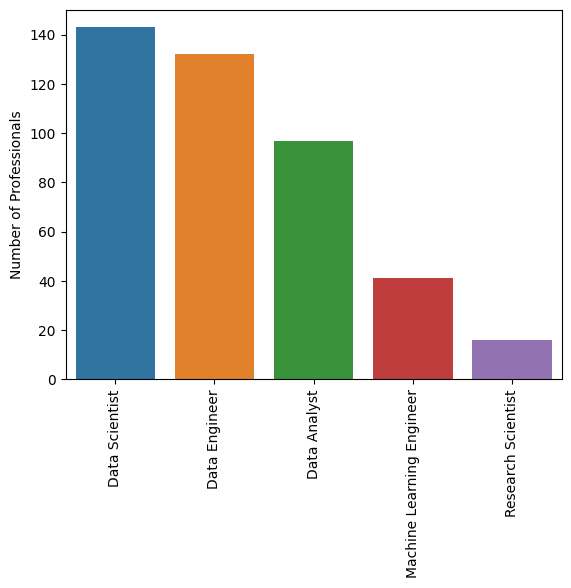

In [7]:
sns.barplot(data=df_visual_salaries, x='Designation', y='Number of Professionals')
plt.xticks(rotation=90)
plt.xlabel("")
plt.show()

In [8]:
# Create Category Job
job_categories = ["Data Science", "Data Analytics", 
                  "Data Engineering", "Machine Learning", 
                  "Managerial"]

ex_categories = ["EN",  "EX",  "MI", "SE"]

In [9]:
# Pengelompokan Job
data_science = "Data Scientist|NLP"
data_analyst = "Analyst|Analytics"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_engineer = "Machine Learning|ML|Big Data|AI"
manager = "Manager|Head|Director|Lead|Principal|Staff"

# Pengelompokan Experience
entry_lvl = "Entry"
ex_lvl = "Executive"
mid_lvl = "Mid"
senior_lvl = "Senior"

In [10]:
# Create conditions for values in flight_categories to be created
conditions_job = [
    (salaries["Designation"].str.contains(data_science)),
    (salaries["Designation"].str.contains(data_analyst)),
    (salaries["Designation"].str.contains(data_engineer)),
    (salaries["Designation"].str.contains(ml_engineer)),
    (salaries["Designation"].str.contains(manager))
]

conditions_ex = [
    (salaries["Experience"].str.contains(entry_lvl)),
    (salaries["Experience"].str.contains(ex_lvl)),
    (salaries["Experience"].str.contains(mid_lvl)),
    (salaries["Experience"].str.contains(senior_lvl))
]

In [11]:
salaries["Job_Category"] = np.select(conditions_job,
                                     job_categories,
                                     default="Other")

salaries["Experience"] = np.select(conditions_ex,
                                     ex_categories,
                                     default="Other")

In [12]:
salaries[["Designation", "Job_Category"]].head()

,Designation,Job_Category
0,Data Scientist,Data Science
1,Machine Learning Scientist,Machine Learning
2,Big Data Engineer,Data Engineering
3,Product Data Analyst,Data Analytics
4,Machine Learning Engineer,Machine Learning


In [13]:
salaries["Experience"].head()

0    MI
1    SE
2    SE
3    MI
4    SE
Name: Experience, dtype: object

In [14]:
# Print the relative frequency of Job_Category
print(salaries["Job_Category"].value_counts(normalize=True).round(3))

Data Engineering    0.288
Data Science        0.264
Data Analytics      0.222
Machine Learning    0.119
Other               0.061
Managerial          0.046
Name: Job_Category, dtype: float64


**Cross-tabulation**

Cross-tabulation can help identify how observations occur in combination.

Using the salaries dataset, which has been imported as a pandas DataFrame, you'll perform cross-tabulation on multiple variables, including the use of aggregation, to see the relationship between "Company_Size" and other variables.

In [15]:
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category
0,2020,Data Scientist,MI,FT,DE,L,0,76227.0,Data Science
1,2020,Machine Learning Scientist,SE,FT,JP,S,0,248257.0,Machine Learning
2,2020,Big Data Engineer,SE,FT,GB,M,50,104100.0,Data Engineering
3,2020,Product Data Analyst,MI,FT,HN,S,0,19097.0,Data Analytics
4,2020,Machine Learning Engineer,SE,FT,US,L,50,143225.0,Machine Learning


In [16]:
# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

Experience    EN  EX  MI   SE
Company_Size                 
L             29  11  86   72
M             30  12  98  186
S             29   3  29   22


In [17]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))

Company_Size       L    M   S
Job_Category                 
Data Analytics    32   91  12
Data Engineering  54  107  14
Data Science      56   81  23
Machine Learning  25   25  22
Managerial        14   11   3
Other             17   11   9


In [18]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean").round(3))

Company_Size               L           M          S
Job_Category                                       
Data Analytics    102997.125   98125.835  43074.500
Data Engineering  113829.889  116668.972  85645.286
Data Science      107865.304  121664.889  70426.870
Machine Learning  123878.520  100849.480  85124.955
Managerial        170102.857  160419.455  98976.333
Other              93068.235   76010.818  71895.556


## Generating new features

**Extracting features for correlation**

In this exercise, you'll work with a version of the salaries dataset containing a new column called "date_of_response".

The dataset has been read in as a pandas DataFrame, with "date_of_response" as a datetime data type.

Your task is to extract datetime attributes from this column and then create a heat map to visualize the correlation coefficients between variables.

In [19]:
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category
0,2020,Data Scientist,MI,FT,DE,L,0,76227.0,Data Science
1,2020,Machine Learning Scientist,SE,FT,JP,S,0,248257.0,Machine Learning
2,2020,Big Data Engineer,SE,FT,GB,M,50,104100.0,Data Engineering
3,2020,Product Data Analyst,MI,FT,HN,S,0,19097.0,Data Analytics
4,2020,Machine Learning Engineer,SE,FT,US,L,50,143225.0,Machine Learning


In [20]:
# Generate a sequence of dates starting from a specific date
start_date = '2020-01-01'
date_range = pd.date_range(start=start_date, periods=len(salaries), freq='D')  # Daily frequency

salaries['date_of_response'] = date_range

In [23]:
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category,date_of_response,month,weekday
0,2020,Data Scientist,MI,FT,DE,L,0,76227.0,Data Science,2020-01-01,1,2
1,2020,Machine Learning Scientist,SE,FT,JP,S,0,248257.0,Machine Learning,2020-01-02,1,3
2,2020,Big Data Engineer,SE,FT,GB,M,50,104100.0,Data Engineering,2020-01-03,1,4
3,2020,Product Data Analyst,MI,FT,HN,S,0,19097.0,Data Analytics,2020-01-04,1,5
4,2020,Machine Learning Engineer,SE,FT,US,L,50,143225.0,Machine Learning,2020-01-05,1,6


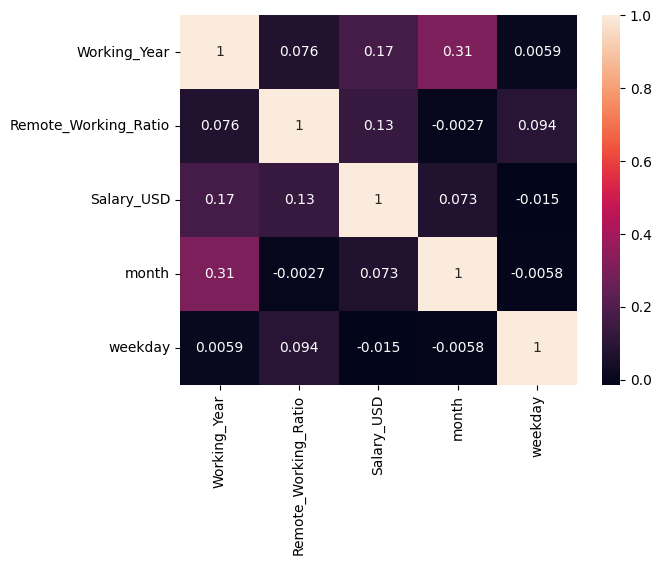

In [22]:
# Get the month of the response
salaries["month"] = salaries["date_of_response"].dt.month

# Extract the weekday of the response
salaries["weekday"] = salaries["date_of_response"].dt.weekday

# Create a heatmap
sns.heatmap(salaries.corr(), annot=True)
plt.show()

**Calculating salary percentiles**

In the video, you saw that the conversion of numeric data into categories sometimes makes it easier to identify patterns.

Your task is to convert the "Salary_USD" column into categories based on its percentiles. First, you need to find the percentiles and store them as variables.

In [26]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)

print(twenty_fifth, salaries_median, seventy_fifth)

"""Tampaknya rentang interkuartil berada di antara 59.893 dan 143.225 dolar!"""

59893.0 96982.0 143225.0


'Tampaknya rentang interkuartil berada di antara 59.893 dan 143.225 dolar!'

**Categorizing salaries**

Now it's time to make a new category! You'll use the variables twenty_fifth, salaries_median, and seventy_fifth, that you created in the previous exercise, to split salaries into different labels.

The result will be a new column called "salary_level", which you'll incorporate into a visualization to analyze survey respondents' salary and at companies of different sizes.

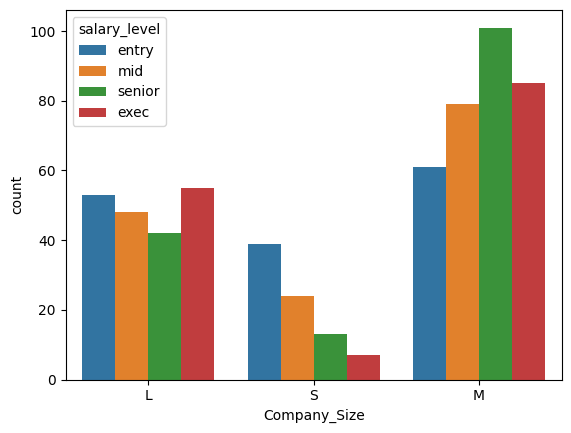

In [27]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

Dengan menggunakan pd.cut() untuk membagi data numerik ke dalam beberapa kategori, Anda dapat melihat bahwa sebagian besar pekerja di perusahaan kecil mendapatkan gaji "pemula", sementara lebih banyak staf di perusahaan menengah yang mendapatkan gaji "senior".

## Generating hypotheses

**Comparing salaries**

Exploratory data analysis is a crucial step in generating hypotheses!

You've had an idea you'd like to explore—do data professionals get paid more in the USA than they do in Great Britain?

You'll need to subset the data by "Employee_Location" and produce a plot displaying the average salary between the two groups.

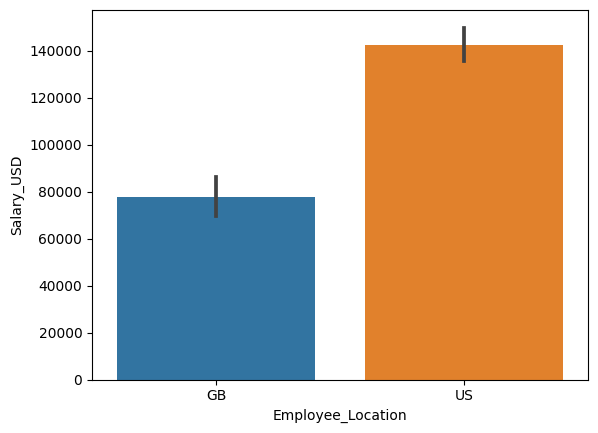

In [30]:
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()

Dengan membagi data, Anda dapat langsung membandingkan gaji antara US dan Great Britain. Visualisasi tersebut menunjukkan bahwa Anda telah membuat hipotesis yang layak diselidiki secara formal untuk menentukan apakah ada perbedaan nyata atau tidak!

**Choosing a hypothesis**

You've seen how visualizations can be used to generate hypotheses, making them a crucial part of exploratory data analysis!

In this exercise, you'll generate a bar plot to inspect how salaries differ based on company size and employment status. For reference, there are four values:

| Value | Meaning |
|--------|----------|
| CT |	Contractor |
| FL |	Freelance |
| PT |	Part-time |
| FT |	Full-time |

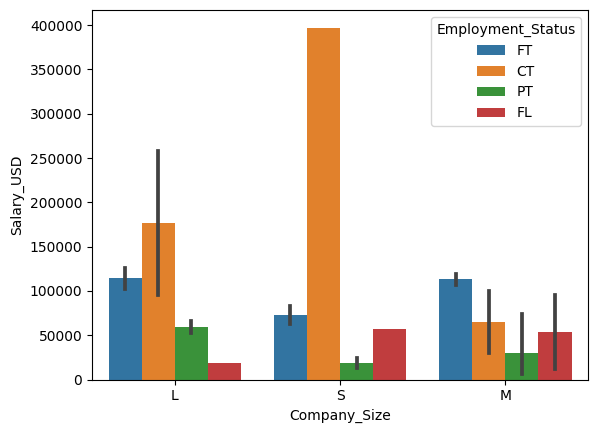

In [31]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, x="Company_Size", y="Salary_USD", hue="Employment_Status")
plt.show()

Berdasarkan data, kontraktor tampaknya dibayar lebih banyak oleh perusahaan kecil secara rata-rata, jadi ini adalah hipotesis yang masuk akal!